In [31]:
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

In [32]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
from sklearn.preprocessing import normalize
X_valid, X_train = (X_train[:5000]/255), (X_train[5000:])/255
y_valid, y_train = y_train[:5000], y_train[5000:]


In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
              'Sneaker', 'Bag', 'Ankle boot']

In [38]:
class_names[y_train[3]]

'Ankle boot'

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

model  = Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])


In [56]:
history = model.fit(X_train,y_train,epochs=12,validation_data=(X_valid,y_valid))

Epoch 1/12
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2414 - accuracy: 0.9084 - val_loss: 0.3065 - val_accuracy: 0.8906
Epoch 2/12
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2333 - accuracy: 0.9109 - val_loss: 0.3093 - val_accuracy: 0.8950
Epoch 3/12
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2215 - accuracy: 0.9154 - val_loss: 0.2896 - val_accuracy: 0.8966
Epoch 4/12
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2170 - accuracy: 0.9177 - val_loss: 0.3125 - val_accuracy: 0.8910
Epoch 5/12
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2057 - accuracy: 0.9211 - val_loss: 0.3085 - val_accuracy: 0.8912
Epoch 6/12
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2014 - accuracy: 0.9228 - val_loss: 0.3122 - val_accuracy: 0.8946
Epoch 7/12
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1930 - accuracy: 0.9269 - val_loss: 0.3267 - val_accuracy:

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
weights,biases = model.layers[1].get_weights()
weights.shape

(784, 300)

(0.0, 1.0)

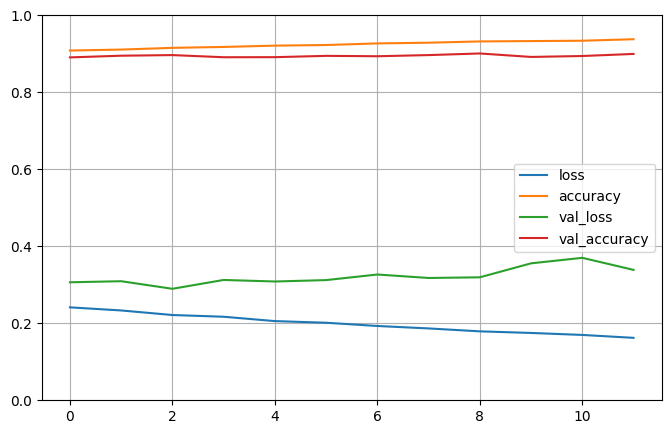

In [61]:
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [68]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 68.1143 - accuracy: 0.8724


[68.11431121826172, 0.8723999857902527]

313/313 [==============================] - 1s 4ms/step


<Axes: >

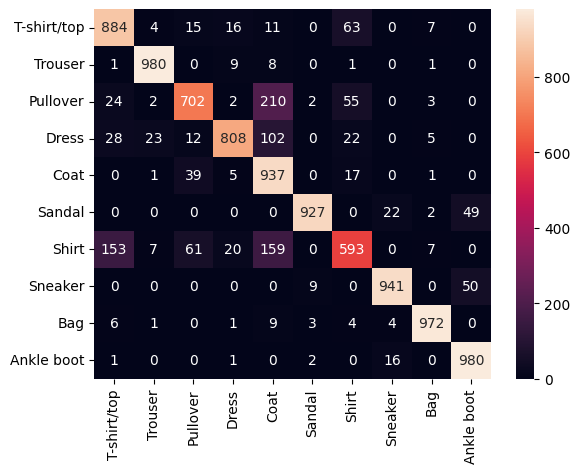

In [75]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)


In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neurons': [100, 200, 300],
    'n_hidden': [1, 2, 3],
    'learning_rate': [0.01, 0.001, 0.0001]
}

model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x000001B11280B550>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.